In [29]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

# Exercise 1

In [30]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """

    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.

        Parameters:
        ----------
        n_inputs : int
            Number of input features
        learning_rate : float
            Learning rate (alpha) for weight updates
        """
        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """
        Step activation function.

        Returns 1 if x >= 0, else 0.
        """
        return int(x >= 0)

    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.

        Parameters:
        ----------
        inputs : array-like
            Input values (x1, x2, ...)

        Returns:
        -------
        int : 0 or 1
        """
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)

    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.

        Parameters:
        ----------
        X : array-like, shape (n_samples, n_features)
            Training inputs
        y : array-like, shape (n_samples,)
            Target outputs (0 or 1)
        epochs : int
            Number of training epochs
        verbose : bool
            If True, print weights after each epoch

        Returns:
        -------
        list : History of (weights, bias) tuples for each epoch
        """
        history = []

        # Store initial weights
        history.append((self.weights.copy(), self.bias))

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])

                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(
                    f"Epoch {epoch + 1}: weights = {self.weights}, "
                    f"bias = {self.bias:.4f}, errors = {total_error}"
                )

            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break

        return history

## Exercise 2

**AND Truth Table**

| A | B | A AND B |
|---|---|---------|
| 0 | 0 |    0    |
| 0 | 1 |    0    |
| 1 | 0 |    0    |
| 1 | 1 |    1    |

### Exercise 2.1

In [31]:
# Define training data for AND
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_and = np.array([0, 0, 0, 1])
print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


### Exercise 2.2

In [32]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")
# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)
# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    if prediction != y_and[i]:
        all_correct = False
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


### Exercise 2.3

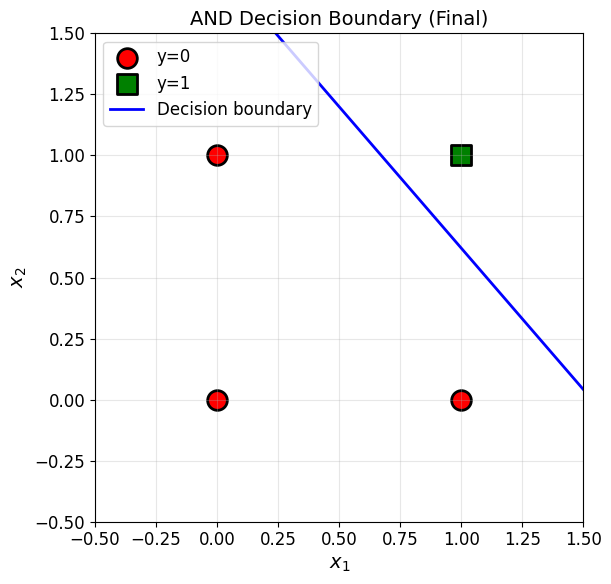

In [33]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.

    Parameters:
    ----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))

    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(
                X[i, 0],
                X[i, 1],
                c="red",
                marker="o",
                s=200,
                edgecolors="black",
                linewidths=2,
                label="y=0" if i == 0 else "",
            )
        else:
            ax.scatter(
                X[i, 0],
                X[i, 1],
                c="green",
                marker="s",
                s=200,
                edgecolors="black",
                linewidths=2,
                label="y=1" if i == 3 else "",
            )

    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    x1_range = np.linspace(-0.5, 1.5, 100)

    if abs(weights[1]) > 1e-10:  # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, "b-", linewidth=2, label="Decision boundary")
    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color="b", linewidth=2, label="Decision boundary")

    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper left")
    ax.set_aspect("equal")
    return ax

# Test the plotting function with the trained AND perceptron
plot_decision_boundary(
    X_and,
    y_and,
    perceptron_and.weights,
    perceptron_and.bias,
    "AND Decision Boundary (Final)",
)
plt.tight_layout()
plt.show()

### Exercise 2.4

AND - Decision Boundary Evolution:


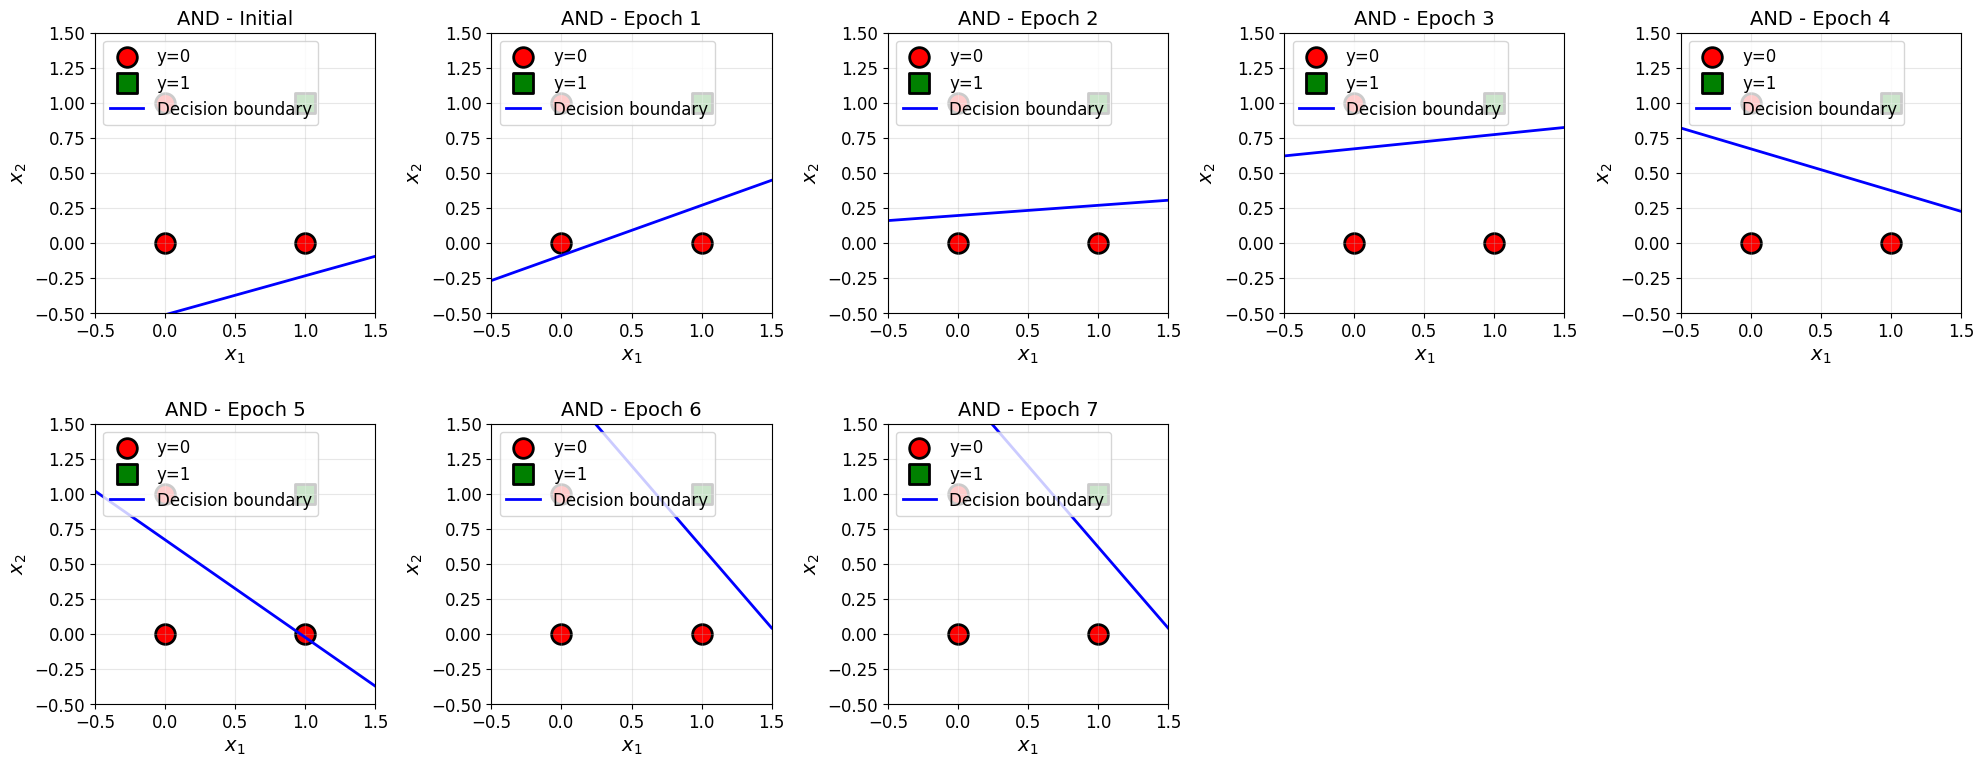

In [34]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)

    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols

    _, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias, f"{title_prefix}{epoch_label}", ax=ax)

    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

### Exercise 2.5

In [35]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
        "Epoch": [],
        "Weights (w1, w2)": [],
        "Bias": [],
    }

    for epoch, (weights, bias) in enumerate(history):
        label = "Initial" if epoch == 0 else epoch
        data["Epoch"].append(label)
        data["Weights (w1, w2)"].append(f"({weights[0]:.4f}, {weights[1]:.4f})")
        data["Bias"].append(f"{bias:.4f}")

    return pd.DataFrame(data)

print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,"Weights (w1, w2)",Bias
0,Initial,"(-0.1255, 0.4507)",0.2320
1,1,"(-0.1255, 0.3507)",0.0320
2,2,"(-0.0255, 0.3507)",-0.0680
3,3,"(-0.0255, 0.2507)",-0.1680
4,4,"(0.0745, 0.2507)",-0.1680
5,5,"(0.1745, 0.2507)",-0.1680
6,6,"(0.1745, 0.1507)",-0.2680
7,7,"(0.1745, 0.1507)",-0.2680


## Exercise 3